In [6]:
import cv2

print(f"OpenCV version is: {cv2.__version__}")

if True:  # change to True if you want to use the notebook locally
    # and use cv2_imshow from matplotlib (eg. Vscode)
    import matplotlib.pyplot as plt

    def cv2_imshow(img):
        plt.figure(figsize=(10,10))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

OpenCV version is: 4.10.0


In [7]:
# TODO: detect, draw and show markers on images 1-6.png
import os

def get_all_file_paths(folder):
  file_paths = []

  for dirpath, _, filenames in os.walk(folder):
    for filename in filenames:
      if dirpath == folder:
        full_path = os.path.join(dirpath, filename)
        file_paths.append(full_path)

  return file_paths

folder_path = 'data'
all_files = get_all_file_paths(folder_path)

dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_16h5)
parameters = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(dictionary, parameters)

for path in all_files:
   print(path)

data/img07.jpg
data/img03.jpg
data/img05.jpg
data/img12.jpg
data/img15.jpg
data/img10.jpg
data/img14.jpg
data/img17.jpg
data/img11.jpg
data/img06.jpg
data/img16.jpg
data/img01.jpg
data/img02.jpg
data/img08.jpg
data/img09.jpg
data/img04.jpg
data/img13.jpg


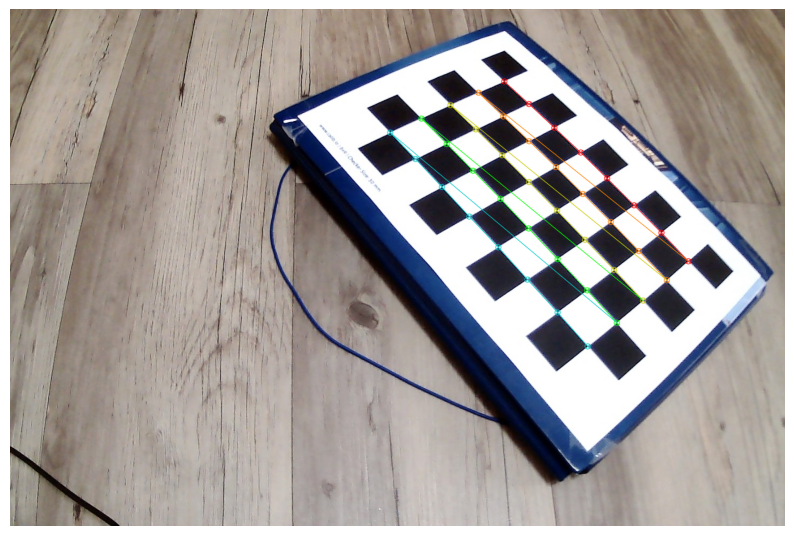

In [10]:
def detect_chessboard(filename):
  current = cv2.imread(filename)
  gray = cv2.cvtColor(current, cv2.COLOR_BGR2GRAY)
  ret, corners = cv2.findChessboardCorners(gray, (8,5), None)

  if ret:
    #print(corners)
    corners2 = cv2.cornerSubPix(
      gray,
      corners,
      (11,11),
      (-1,-1),
      (cv2.TermCriteria_MAX_ITER + cv2.TERM_CRITERIA_EPS, 30, 0.0001)
    )

    cv2.drawChessboardCorners(current, (8,5), corners2, ret)
    cv2_imshow(current)

detect_chessboard('data/img01.jpg')

In [9]:
import numpy as np

def get_objpoints(shape, width):
  x, y = shape
  xx, yy = np.meshgrid(np.linspace(0, width * (x - 1), x), 
                       np.linspace(0, width * (y - 1), y), 
                       indexing='ij')
  xx, yy = xx.reshape(-1), yy.reshape(-1)
  objarr = np.vstack([xx, yy, np.zeros(len(xx))]).T

  return objarr.astype(np.float32)

def xd():
  objp = np.zeros((6*7,3), np.float32)
  objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
  return objp

get_objpoints((4, 3), 30)
xd()

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.],
       [6., 5., 0.]], dtype=float32)

In [ ]:

#detect_chessboard(all_files[0])

#for file in all_files:
#  detect_draw_show(file)